In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [4]:
df = pd.read_csv("PreProcessingOutput/Preprocessed_Life_Expectancy_Preprocessed.csv")


In [5]:
Y = df['Life expectancy ']
X = df.drop(['Life expectancy '], axis=1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [7]:
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [8]:
comparison_df_lr = pd.DataFrame({
    "Actual": y_test.values, 
    "Predicted (Linear Regression)": y_pred_lr
})

In [9]:
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [10]:
print("\nLinear Regression Performance:")
print(f"R2 Score: {r2_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")



Linear Regression Performance:
R2 Score: 0.8241
Mean Absolute Error (MAE): 2.86
Mean Squared Error (MSE): 15.24
Root Mean Squared Error (RMSE): 3.90


In [11]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [12]:
comparison_df_dt = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted (Decision Tree)": y_pred_dt
})


In [13]:
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)


In [14]:
print("\nDecision Tree Regressor Performance:")
print(f"R2 Score: {r2_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")


Decision Tree Regressor Performance:
R2 Score: 0.9281
Mean Absolute Error (MAE): 1.52
Mean Squared Error (MSE): 6.23
Root Mean Squared Error (RMSE): 2.50


In [15]:
if r2_lr > r2_dt:
    print("\nLinear Regression performs better and is recommended for this problem.")
elif r2_dt > r2_lr:
    print("\nDecision Tree Regressor performs better and is recommended for this problem.")
else:
    print("\nBoth models have similar performance; choose based on other considerations like simplicity or interpretability.")


Decision Tree Regressor performs better and is recommended for this problem.


In [16]:
import matplotlib.pyplot as plt


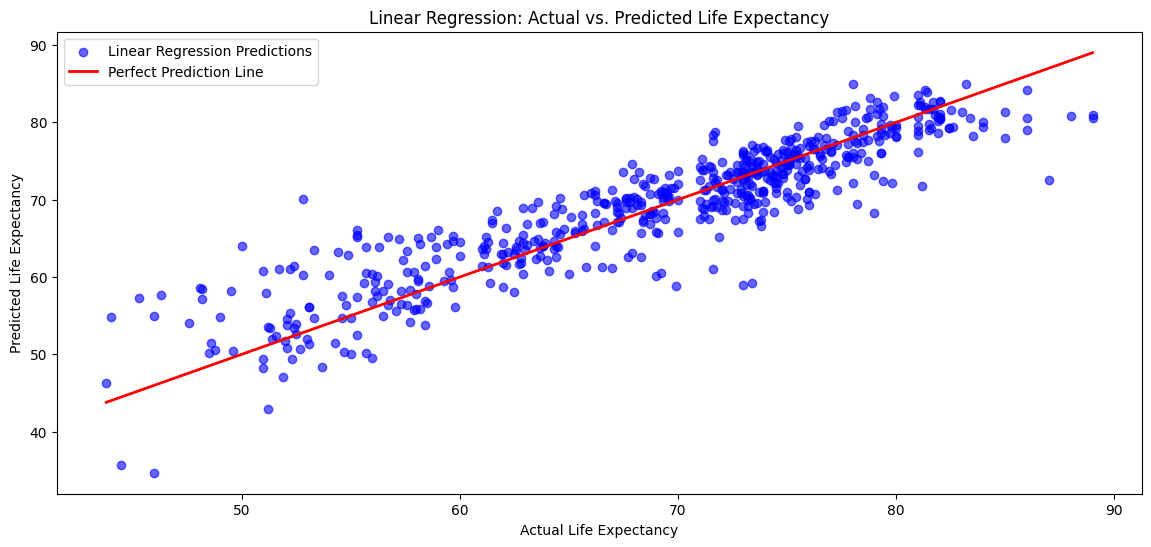

In [17]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Linear Regression: Actual vs. Predicted Life Expectancy')
plt.legend()
plt.show()

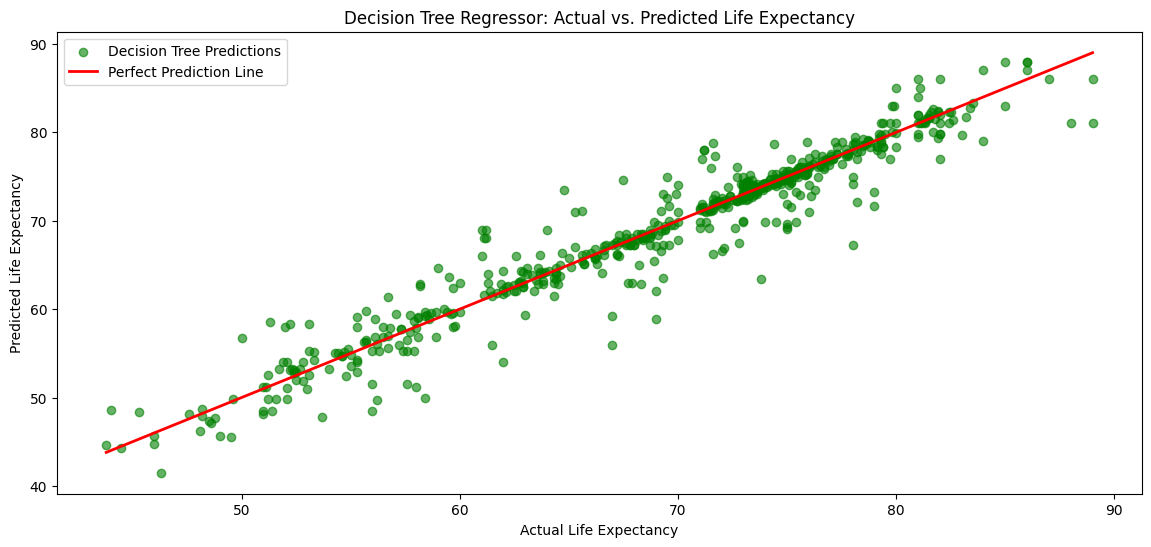

In [18]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.6, label='Decision Tree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Decision Tree Regressor: Actual vs. Predicted Life Expectancy')
plt.legend()
plt.show()